# Plotting nicer graphs : parametrised conductivity
* For plotting nicer plot we use plt.imshow().
* First we convert the unstructured data to mesh grid then use plt.imshow()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata # interpolation
from mpl_toolkits.mplot3d import Axes3D # for 3D if needed
from matplotlib import cm # colormap
from matplotlib import ticker # controls number of ticks in colorbar, helpful for very ugly unsymmetric colorbar

In [2]:
# Loading solution
# Link: https://github.com/lululxvi/deepxde/issues/17
# In test.dat, the first column is x coordinate, the second column is y coordinate, the 3rd column is y_true, the 4th column is y_pred.

data = np.genfromtxt('test.dat')
np.shape(data)

(41760, 4)

In [3]:
x_array, y_array, k_array, y_pred = data[:,0], data[:,1], data[:,2], data[:,3]

In [4]:
nodes_deepxde = data[:,0:2]
print(np.shape(nodes_deepxde), np.shape(y_pred))
#print((nodes_deepxde), (y_pred))

(41760, 2) (41760,)


In [5]:
first_file = np.genfromtxt('true_solution/k=0.1_test.dat')
second_file = np.genfromtxt('true_solution/k=0.5_test.dat')
third_file = np.genfromtxt('true_solution/k=1.0_test.dat')

In [6]:
nodes_true = first_file[:,0:2]
first_true = first_file[:,2]
second_true = second_file[:,2]
third_true = third_file[:,2]

In [7]:
# Loading loss
loss_data = np.genfromtxt('loss.dat')
print(np.shape(loss_data))
# iterations
print(loss_data[:,0])

(124, 11)
[     0.   1000.   2000.   3000.   4000.   5000.   6000.   7000.   8000.
   9000.  10000.  11000.  12000.  13000.  14000.  15000.  16000.  17000.
  18000.  19000.  20000.  21000.  22000.  23000.  24000.  25000.  26000.
  27000.  28000.  29000.  30000.  30000.  31000.  32000.  33000.  34000.
  35000.  36000.  37000.  38000.  39000.  40000.  41000.  42000.  43000.
  44000.  45000.  46000.  47000.  48000.  49000.  50000.  51000.  52000.
  53000.  54000.  55000.  56000.  57000.  58000.  59000.  60000.  60000.
  61000.  62000.  63000.  64000.  65000.  66000.  67000.  68000.  69000.
  70000.  71000.  72000.  73000.  74000.  75000.  76000.  77000.  78000.
  79000.  80000.  81000.  82000.  83000.  84000.  85000.  86000.  87000.
  88000.  89000.  90000.  90000.  91000.  92000.  93000.  94000.  95000.
  96000.  97000.  98000.  99000. 100000. 101000. 102000. 103000. 104000.
 105000. 106000. 107000. 108000. 109000. 110000. 111000. 112000. 113000.
 114000. 115000. 116000. 117000. 118000. 

In [8]:
# out of 11 columns
# columns 1 : iterations
# 4 BCs *2 for train and test = 8 columns
# 1 PDE*2 for train and test = 2 columns
# total 11 columns
# we can ignore the test data i.e. last 5 columns
steps_number, BC1, BC2, BC3, BC4, PDE = loss_data[:,0], loss_data[:,1], loss_data[:,2], loss_data[:,3], loss_data[:,4], loss_data[:,5]

In [9]:
max_iter = int(loss_data[-1,0])
print((max_iter))

120000


In [10]:
BC_loss_array = BC1 + BC2 + BC3 + BC4
PDE_loss_array = PDE
total_loss_array = BC1 + BC2 + BC3 + BC4 + PDE
best_u_pred = y_pred

In [11]:
# # Loading exact results
# exact_data = np.load('final_data.npz') # load true solution
# keys = list(exact_data.keys()) # all keys in the dictionary
# print(keys)

In [12]:
# nodes = exact_data[keys[0]] # nodal coordinates
# temperature = exact_data[keys[1]] # nodal temperature
# nodes = nodes[:,[0,2]]
# print(np.shape(nodes))
# print(np.shape(temperature))

## Plot loss

In [13]:
#plt.scatter(nodes_true[:,0],nodes_true[:,1],c= first_true)

In [14]:
# plt.figure(1,dpi=300)
# iter_array = steps_number
# plt.plot(iter_array,test_error_array)
# plt.plot([best_iter,best_iter],[0,best_error_vec],'o-k')
# plt.xlabel('Epoch')
# plt.ylabel('Validation Error')
# # See this post how to remove the legend lines: https://stackoverflow.com/questions/25123127/how-do-you-just-show-the-text-label-in-plot-legend-e-g-remove-a-labels-line
# plt.legend(['Best iteration: '+str(best_iter),'Best error: ' +str(best_error_vec)],handlelength=0, handletextpad=0, fancybox=True,markerscale=0)

# plt.ylim(bottom=0)  # https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.ylim.html
# #plt.savefig('Test_error_'+str(max_iter)+'_iteration.jpg',dpi=150)

## Loss curve


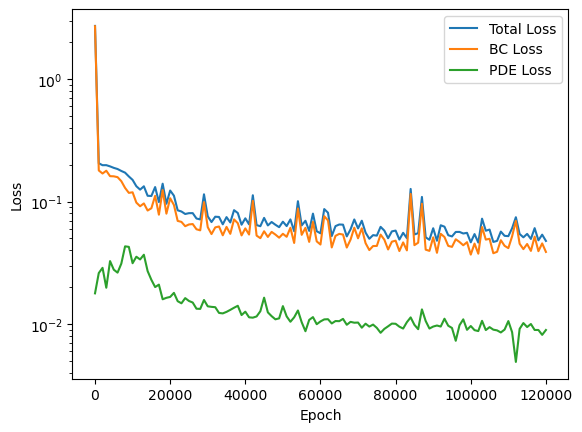

In [15]:
plt.figure(2, dpi=100)

iter_array = steps_number
plt.plot(iter_array, total_loss_array)
plt.plot(iter_array, BC_loss_array)
plt.plot(iter_array, PDE_loss_array)
plt.legend(['Total Loss','BC Loss','PDE Loss'])
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('plots/loss_'+str(max_iter)+'_iteration.jpg',dpi=150)

## Some values

In [16]:
ub = [x_array.max(), y_array.max()]
lb = [x_array.min(), y_array.min()]
print(ub)
print(lb)
n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
#X, Y = np.meshgrid(x,y)

[0.5, 1.0]
[-0.5, 0.0]


## Ground truth (we don't know)

In [17]:
# fig = plt.figure(dpi=300)
# ax = fig.add_subplot(111)#, projection='3d')

# new_data = griddata(nodes, temperature.flatten(), (X, Y), method='cubic')
# sc = ax.imshow(new_data, interpolation='nearest', cmap='jet', 
#                   extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
#                   origin='lower', aspect='equal')

# #sc = ax.scatter(nodes[:,0], nodes[:,1], c = temperature,s=3, cmap=cm.jet)
# plt.colorbar(sc)
# plt.xlabel('x')
# plt.ylabel('y')
# #ax.set_zlabel('z')
# #plt.title('Temperature distribution')
# #plt.savefig('Exact.jpg', dpi = 200)

## Best PINN prediction

In [18]:
def return_indices(lower_limit_k, upper_limit_k, k):
    # returns indices for k (conductivity) between lower_limit_k and upper_limit_k
    indices = []
    for index,item in enumerate(k):
        if upper_limit_k>item>lower_limit_k:
            indices.append(index)
    # move out of the function to see the plot 
    #print(np.shape(indices))
    #plt.plot(k[indices])
    return indices

/tmp/ipykernel_68508/4051344835.py:18: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_under('k')
/tmp/ipykernel_68508/4051344835.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc.cmap.set_over('k')


Text(0, 0.5, 'y')

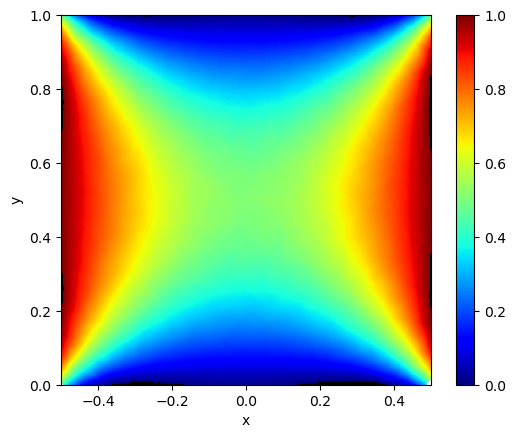

In [19]:
# trying to plot 1 plot
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)#, projection='3d')
n_points = 1000
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
indices = return_indices(lower_limit_k = 0.96, upper_limit_k=1.0, k=k_array)
X, Y = np.meshgrid(x,y)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
sc = ax.imshow(new_data, interpolation='nearest', cmap='jet', 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)

#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
plt.colorbar(sc)
sc.cmap.set_under('k')
sc.cmap.set_over('k')
plt.xlabel('x')
plt.ylabel('y')
#ax.set_zlabel('z')
#plt.title('Temperature distribution')
#plt.savefig('plots/Iteration_'+str(max_iter)+'_Best_PINN_predicted.jpg', dpi = 200)

## PINN prediction subplot

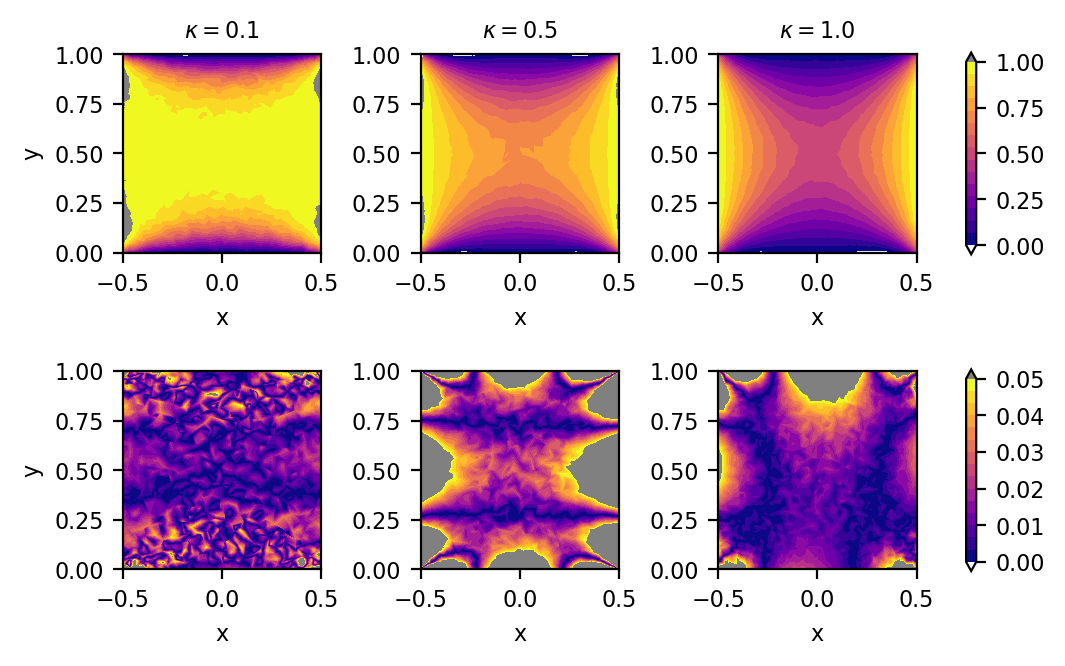

In [22]:
fig, ax = plt.subplots(2, 3,dpi=200)
#ax = fig.add_subplot(111)#, projection='3d')
n_points = 1000
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)
# PINN predictions
indices = return_indices(lower_limit_k = 0.08, upper_limit_k=0.12, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
sc1 =  ax[0,0].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)
sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')

#indices = return_indices(lower_limit_k = 0.58, upper_limit_k=0.62, k=k_array)
new_data_1 = griddata(nodes_true, first_true.flatten(), (X, Y), method='linear')
sc2 =  ax[1,0].imshow(abs(new_data_1-new_data), interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')

indices = return_indices(lower_limit_k = 0.48, upper_limit_k=0.52, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
sc1 =  ax[0,1].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)
sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')
#indices = return_indices(lower_limit_k = 0.88, upper_limit_k=0.92, k=k_array)
new_data_1 = griddata(nodes_true, second_true.flatten(), (X, Y), method='linear')
sc2 =  ax[1,1].imshow(abs(new_data_1-new_data), interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')
indices = return_indices(lower_limit_k = 0.96, upper_limit_k=1.0, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
sc1 =  ax[0,2].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)
sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')

#indices = return_indices(lower_limit_k = 0.96, upper_limit_k=1.0, k=k_array)
new_data_1 = griddata(nodes_true, third_true.flatten(), (X, Y), method='linear')
sc2 =  ax[1,2].imshow(abs(new_data_1-new_data), interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes_deepxde[:,0].min(), nodes_deepxde[:,0].max(), nodes_deepxde[:,1].min(), nodes_deepxde[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')
#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
#plt.colorbar(sc)
# # setting color bounds on PINN predictions only
# sc1.cmap.set_under('k')
# sc1.cmap.set_over('k')

sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')

#  setting axis labels and size
ax[0,0].set(xlabel='x', ylabel='y')
# big axis lebel looks ugly, defauly is 10, I set it to 8. see this: https://stackoverflow.com/a/46651121/14598633
ax[0,0].xaxis.label.set_size(8)
ax[0,0].yaxis.label.set_size(8)
#ax[0,0].set_xticks([])
ax[0,1].set(xlabel='x', ylabel='')
ax[0,1].xaxis.label.set_size(8)
ax[0,1].yaxis.label.set_size(8)
#ax[0,1].set_xticks([])
#ax[0,1].set_yticks([])
ax[0,2].set(xlabel='x', ylabel='')
ax[0,2].xaxis.label.set_size(8)
ax[0,2].yaxis.label.set_size(8)
#ax[0,2].set_xticks([])
#ax[0,2].set_yticks([])
ax[1,0].set(xlabel='x', ylabel='y')
ax[1,0].xaxis.label.set_size(8)
ax[1,0].yaxis.label.set_size(8)
ax[1,1].set(xlabel='x', ylabel='')
ax[1,1].xaxis.label.set_size(8)
ax[1,1].yaxis.label.set_size(8)
#ax[1,1].set_yticks([])
ax[1,2].set(xlabel='x', ylabel='')
ax[1,2].xaxis.label.set_size(8)
ax[1,2].yaxis.label.set_size(8)
#ax[1,2].set_yticks([])
#ax[1,2].tick_params(axis='x', labelsize= 5)

# Setting title
ax[0,0].set_title(r'$\kappa=0.1$',fontsize=8)
ax[0,1].set_title(r'$\kappa=0.5$',fontsize=8)
ax[0,2].set_title(r'$\kappa=1.0$',fontsize=8)
#ax[1,0].set_title(r'$\kappa=0.6$',fontsize=8)
#ax[1,1].set_title(r'$\kappa=0.8$',fontsize=8)
#ax[1,2].set_title(r'$\kappa=1.0$',fontsize=8)

# tight layout is mostly good but not here. Plots becomes too small to see anything.
#fig.tight_layout()

# see this for tick label [numbers on axis] adjustment: https://stackoverflow.com/a/11386056/14598633
# default is 10
for col in range(3):
    for row in range(2):
        ax[row, col].tick_params(axis='both', which='major', labelsize=8)


# This one is better than tight_layout
# adjust width and height:https://stackoverflow.com/a/6541454/14598633
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.25   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=bottom, right=None, top=None, wspace=wspace, hspace=hspace)

# for customised colormaps, see: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html
cbar1 = fig.colorbar(sc1, ax=[ax[0,0],ax[0,1],ax[0,2]], shrink=0.7,extend='both')
cbar1.ax.tick_params(labelsize=8) # colorbar label size
cbar2 = fig.colorbar(sc2, ax=[ax[1,0],ax[1,1],ax[1,2]], shrink=0.7,extend='both')
cbar2.ax.tick_params(labelsize=8) # colorbar label size
# It turns out cbar2 looks very ugly with only 2 ticks, so to add more tick/bins, do the following.
tick_locator = ticker.MaxNLocator(nbins=6) # 6 bins comes from hit and trial. No rules
cbar2.locator = tick_locator
cbar2.update_ticks()

plt.savefig('plots/Iteration_'+str(max_iter)+'_PINN_predicted-subplot.jpg', dpi = 500, bbox_inches='tight',transparent=True)

In [21]:
# k=0.1
indices = return_indices(lower_limit_k = 0.08, upper_limit_k=0.12, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
new_data_1 = griddata(nodes_true, first_true.flatten(), (X, Y), method='linear')
# to ignore NANs
# https://datascience.stackexchange.com/a/11933

new_data = np.nan_to_num(new_data)
new_data_1 = np.nan_to_num(new_data_1)

rel_l2_norm_1 = np.linalg.norm(abs(new_data-new_data_1),2)/np.linalg.norm(new_data_1,2)
print("Data 1:",rel_l2_norm_1)
# K= 0.5
indices = return_indices(lower_limit_k = 0.48, upper_limit_k=0.52, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
new_data_1 = griddata(nodes_true, second_true.flatten(), (X, Y), method='linear')

new_data = np.nan_to_num(new_data)
new_data_1 = np.nan_to_num(new_data_1)

rel_l2_norm_2 = np.linalg.norm(abs(new_data-new_data_1),2)/np.linalg.norm(new_data_1,2)
print("Data 2:",rel_l2_norm_2)

indices = return_indices(lower_limit_k = 0.96, upper_limit_k=1.0, k=k_array)
new_data = griddata(nodes_deepxde[indices], best_u_pred[indices].flatten(), (X, Y), method='linear')
new_data_1 = griddata(nodes_true, second_true.flatten(), (X, Y), method='linear')

new_data = np.nan_to_num(new_data)
new_data_1 = np.nan_to_num(new_data_1)

rel_l2_norm_3 = np.linalg.norm(abs(new_data-new_data_1),2)/np.linalg.norm(new_data_1,2)
print("Data 3:",rel_l2_norm_3)

average_L2_error = (rel_l2_norm_1 + rel_l2_norm_2 + rel_l2_norm_3)/3
print("average",average_L2_error)


Data 1: 0.01770643618850938
Data 2: 0.0789882337760066
Data 3: 0.21246129310273318
average 0.10305198768908304
